IMPORT ALL THE NECCESSORY LIBRARIES

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT ALL PREPROCESSING LIBRARIES AND ALL CLASSIFICATION MODELS

In [42]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
!pip install AdaBoostClassifier

ERROR: Could not find a version that satisfies the requirement AdaBoostClassifier (from versions: none)
ERROR: No matching distribution found for AdaBoostClassifier


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve, roc_auc_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from sklearn.ensemble import AdaBoostClassifier


LOAD THE DATSET

In [44]:
data=pd.read_csv('/content/diabetes.csv')
df=data.copy()

DATA EXPLORATION

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.shape#shape of the dataset

(768, 9)

There are 768 rows and 9 columns

In [47]:
df.columns#to identify the columns of the dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [48]:
df.info()#basic informations aboutthe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All available columns are of numerical type.

In [49]:
df.describe()#statistics of numerical columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


IN THE GIVEN DATASET 'OUTCOME' IS THE DEPENDENT (TARGET)COLUMN .

DISTRIBUTION

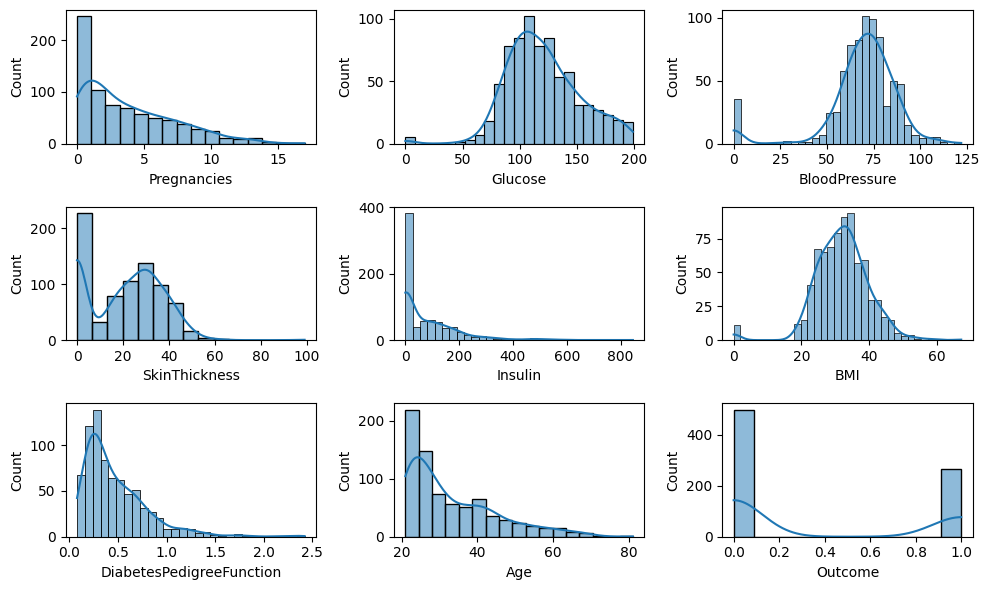

In [50]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)  # Explicitly set xlabel for each subplot
    plt.tight_layout()  # Adjust subplot parameters for a tight layout


IN THE GIVEN DATSET The zeros in the dataset are actually nan values(except target column).
WE NEED TO FIND THE ZEROS AND IMPUTE THEM.

In [51]:
# Identify zero values in all columns except the target column ('Outcome')
zero_values = df.loc[:, df.columns != 'Outcome'] == 0
zero_values_count = zero_values.sum()
zero_values_count


,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


Replace this zero values with nan and then impute using median value

In [52]:
# Replace this zero values with nan and then impute using median value
for column in df.columns[:-1]:  # Iterate through all columns except 'Outcome'
    df[column] = df[column].replace(0, np.nan)

In [53]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [54]:
# Fill NaN values with the median for each column
for col in df.columns[:-1]:
  df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

<ipython-input-54-f4ecc79ebad6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


BOXPLOT

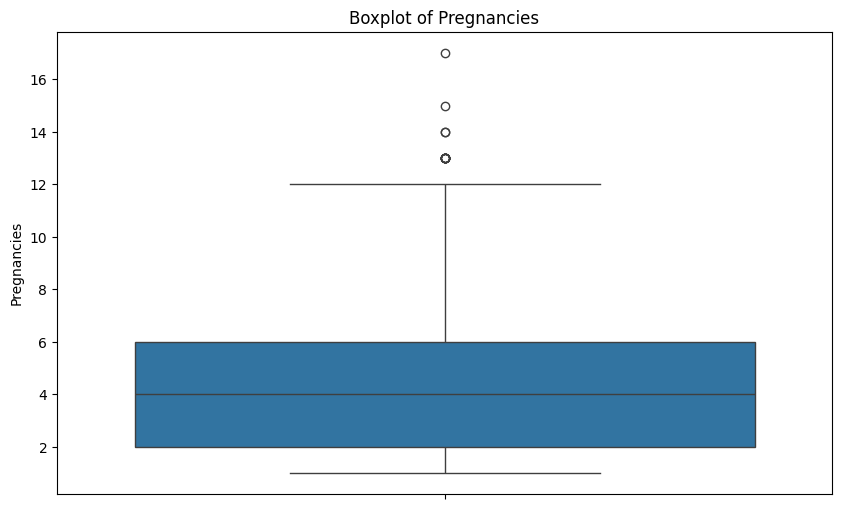

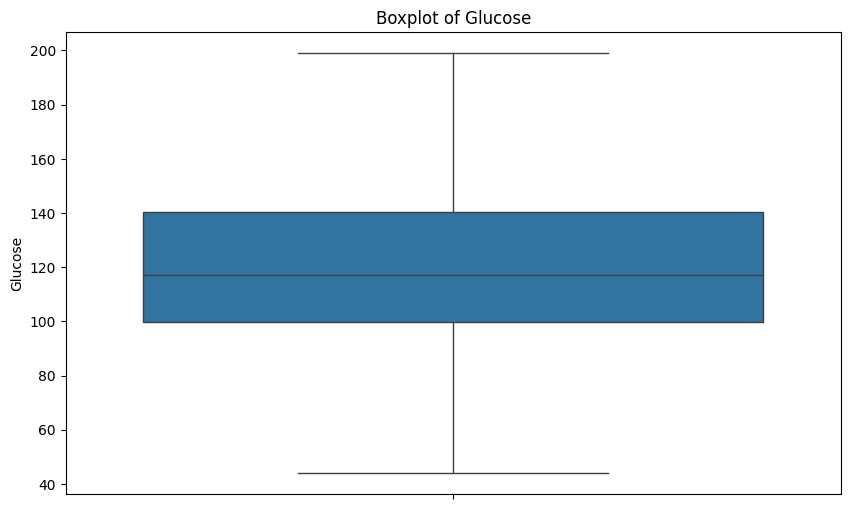

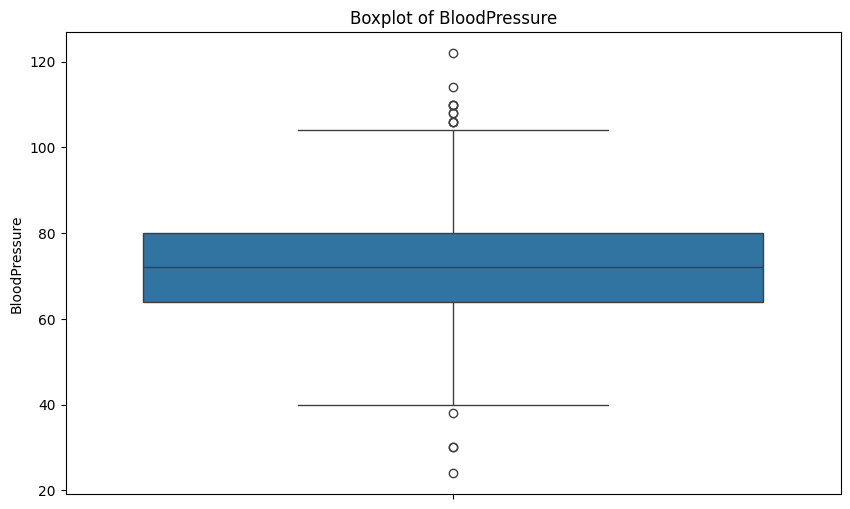

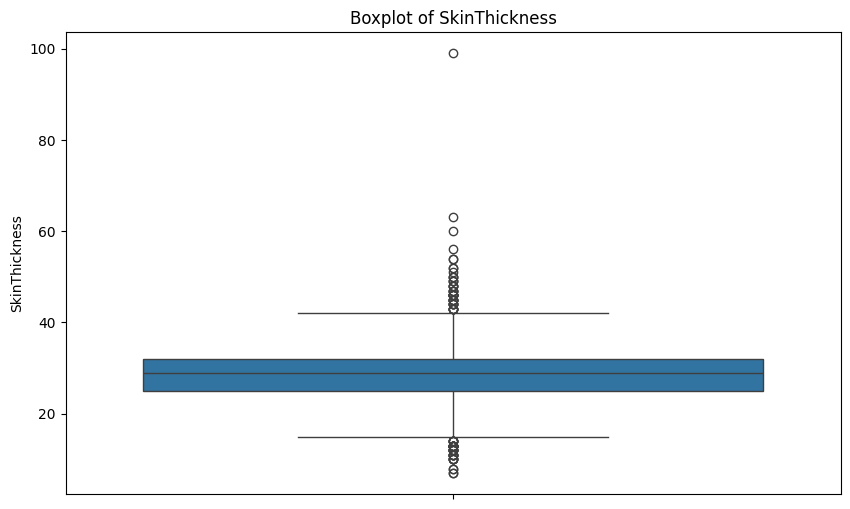

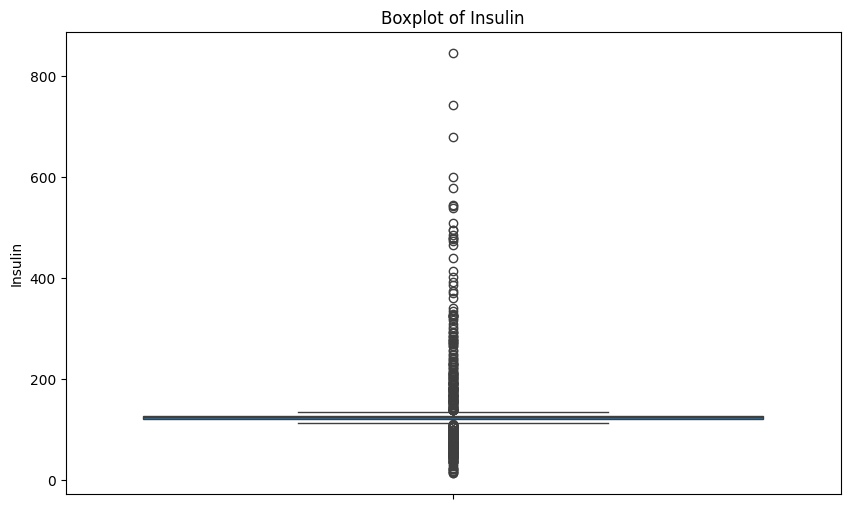

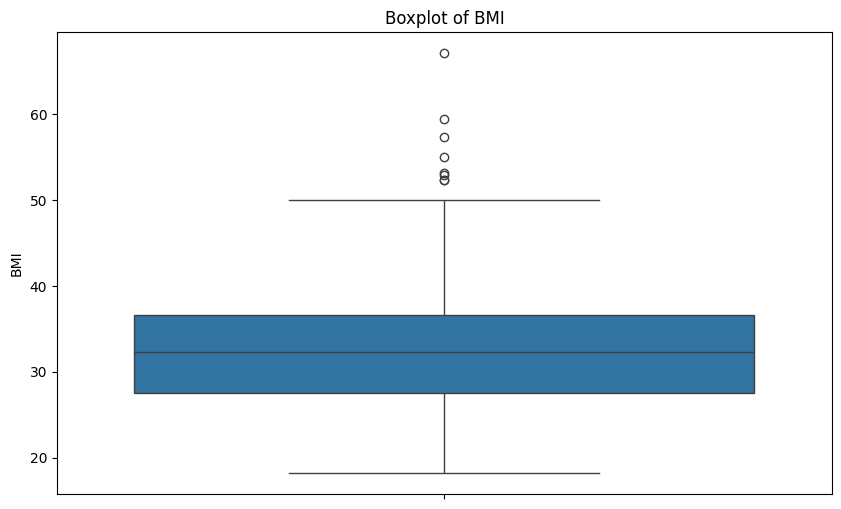

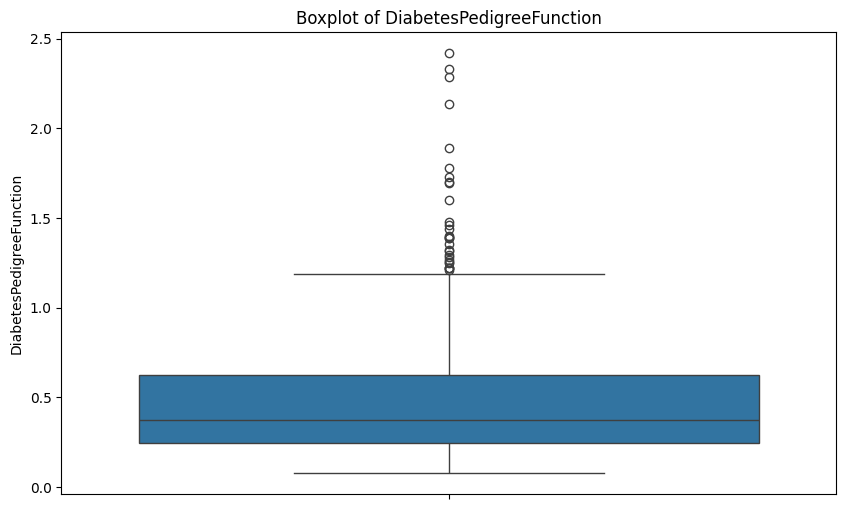

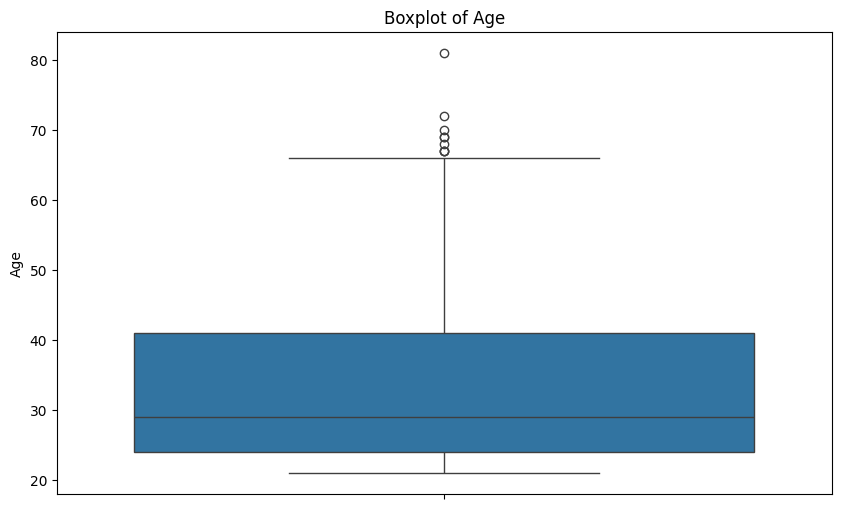

In [55]:
for col in df.columns:
  if col != 'Outcome':
    plt.figure(figsize=(10,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


CORRELATION MATRIX AND HEATMAP

In [56]:
corr_matrix=df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


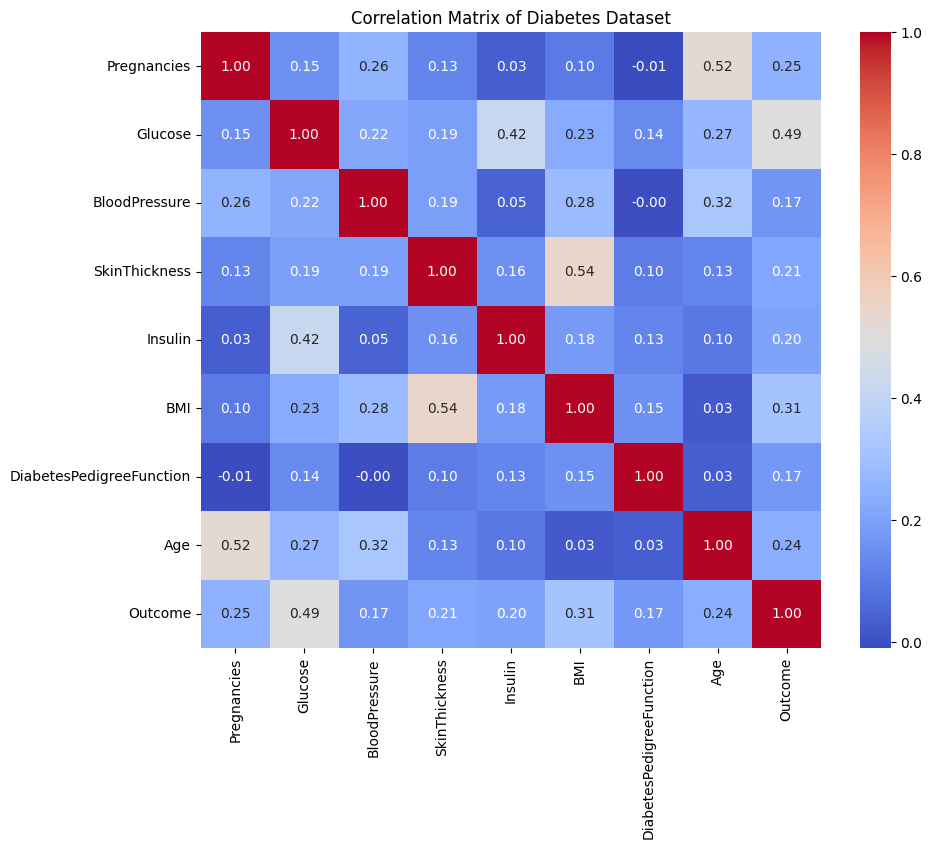

In [57]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

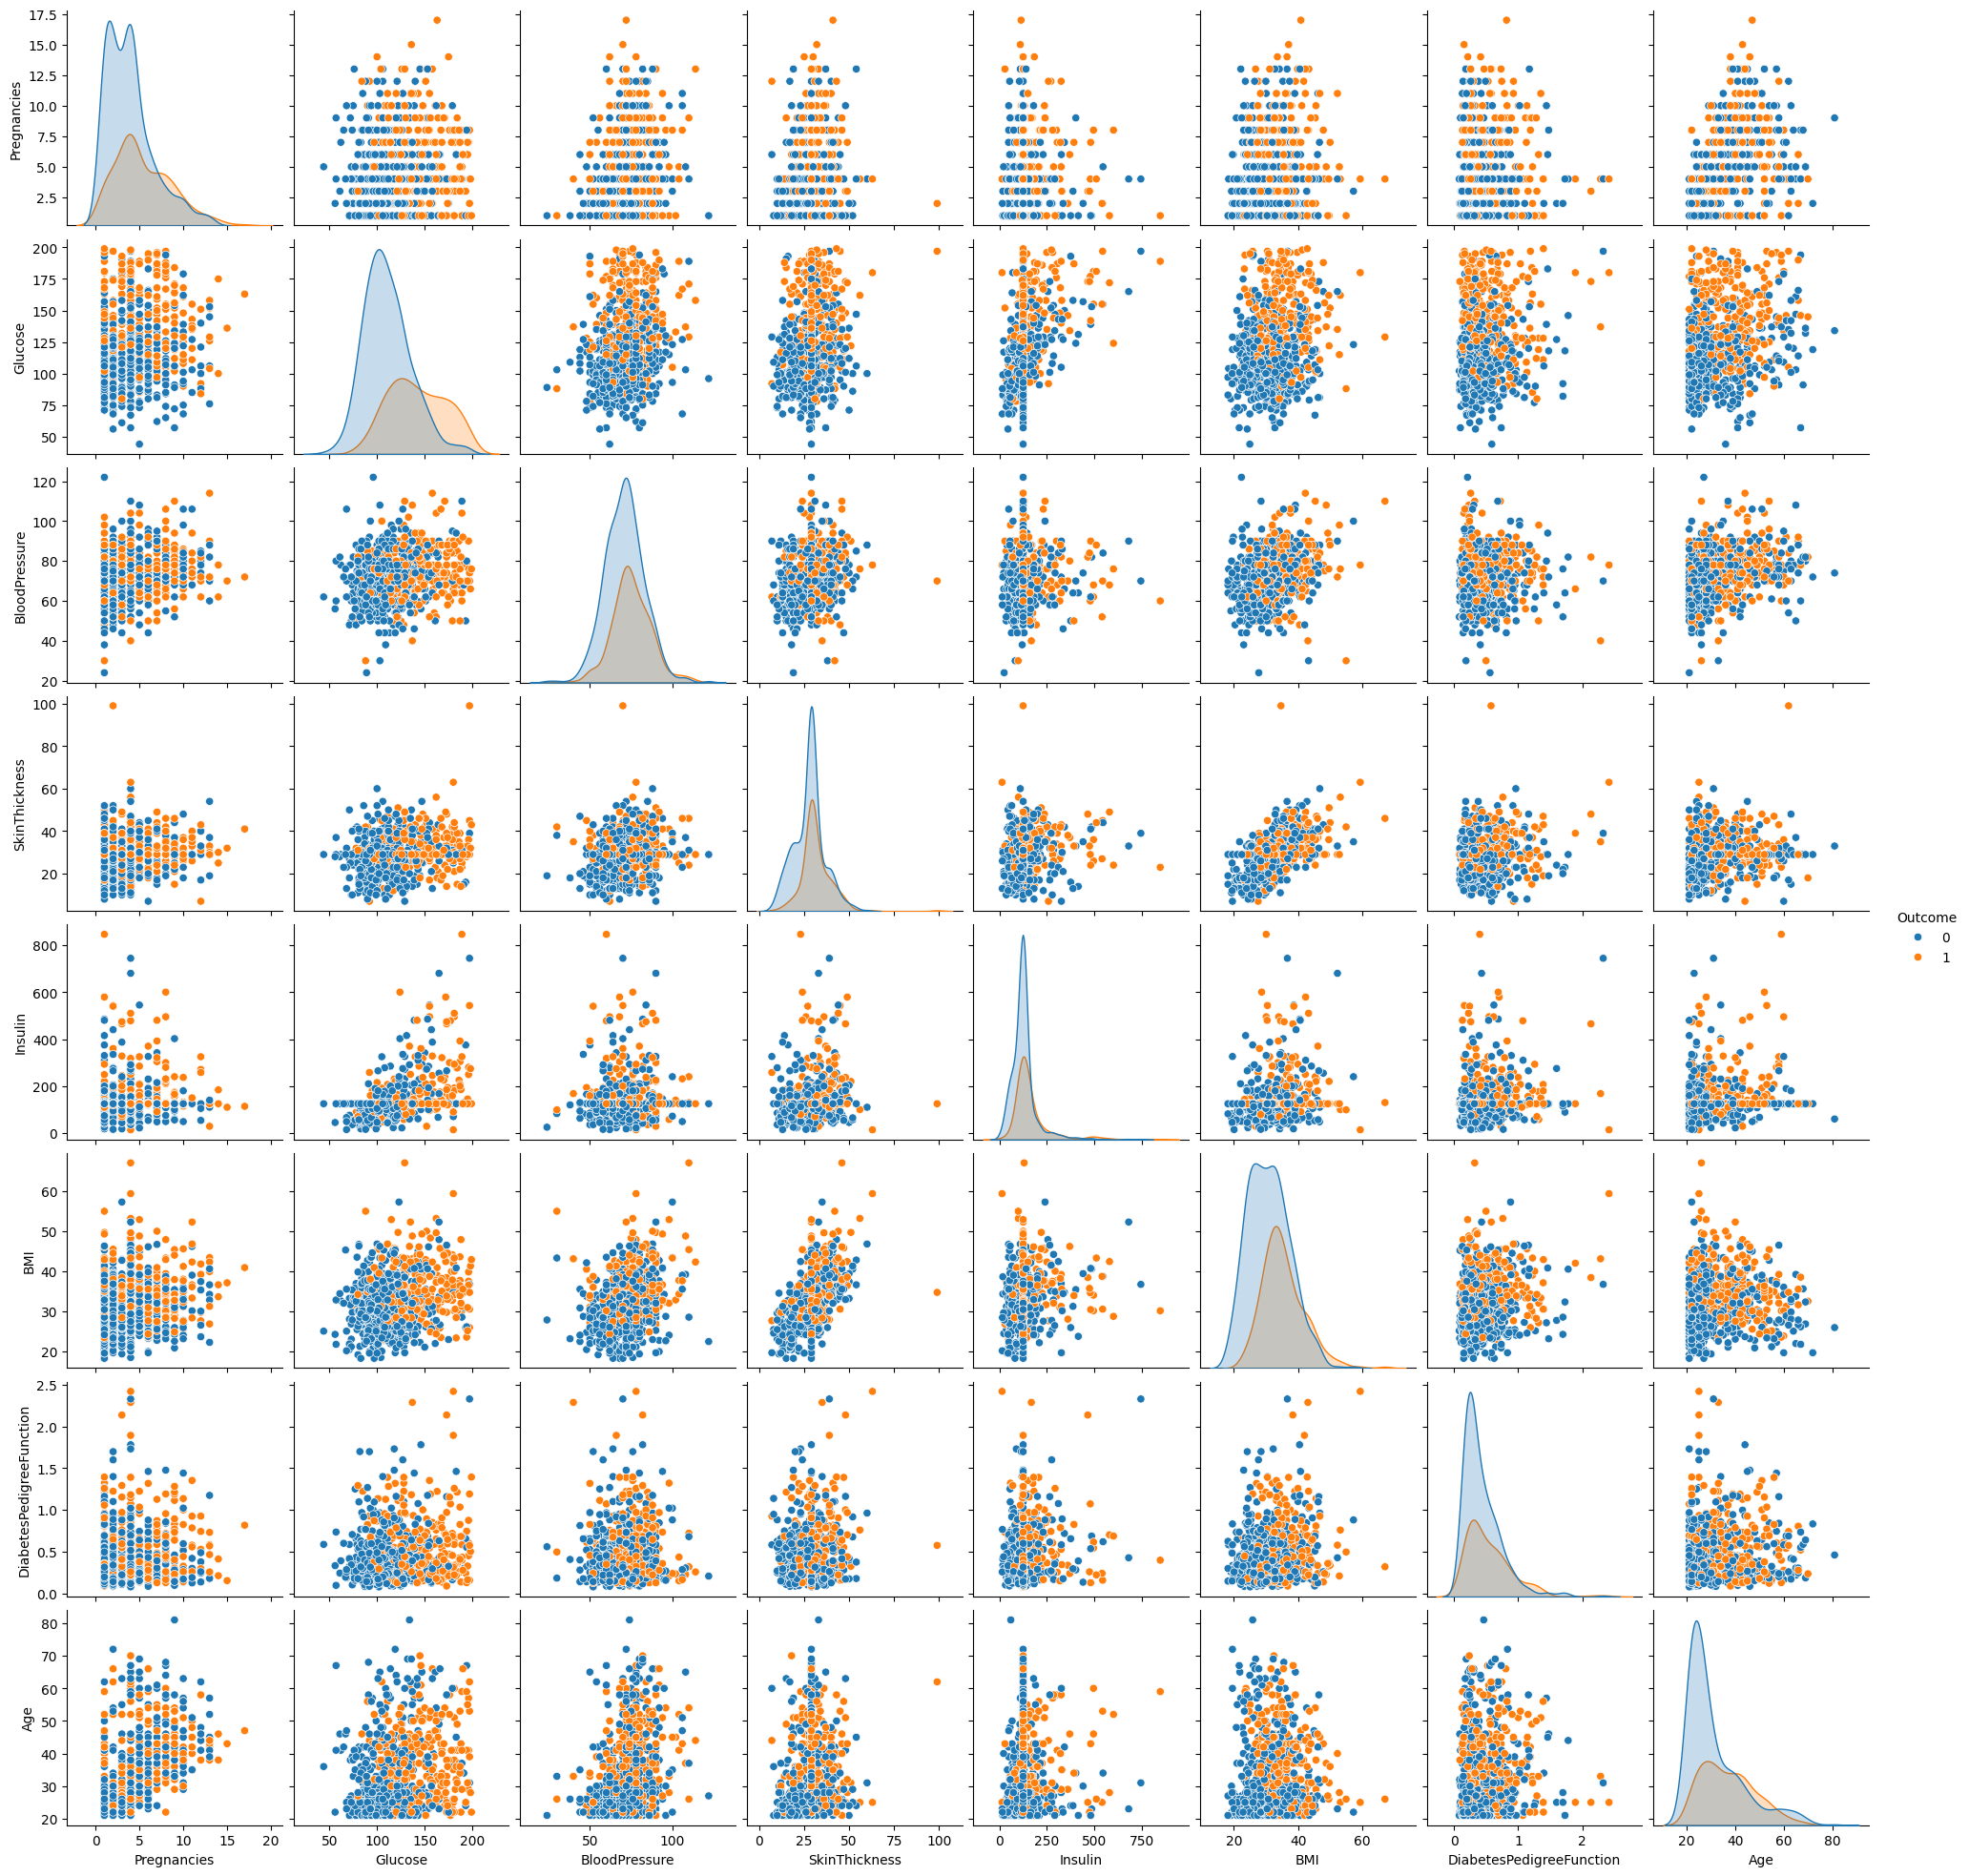

In [58]:
#SCATTER PLOT
sns.pairplot(df,hue='Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


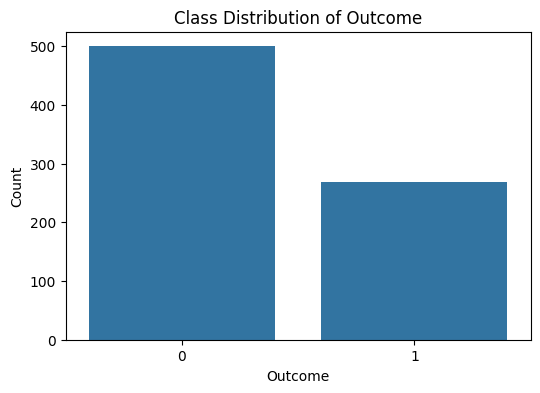

In [59]:
# Check for class imbalance in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

# # Calculate the percentage of each class
outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100
print(outcome_percentages)


# outcome_percentages = outcome_counts / len(df) * 100
# print(outcome_percentages)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


Target is imbalanced ,so oversample

DATA SPLITTING FOR MODELLING

In [60]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

OVERSAMPLING TO REMOVE IMBALANCE IN THE TARGET

In [61]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the target column
smote = SMOTE(random_state=42)#sampling_strategy='minority'
x, y= smote.fit_resample(x, y)



In [62]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [63]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

SCALING

In [64]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [65]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [66]:
type(x_train)

numpy.ndarray

convert to dataframe

In [67]:
#from re import X
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [68]:
type(x_train)

pandas.core.frame.DataFrame

In [69]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.157566,-0.288268,1.607328,-0.078831,-0.234188,0.149667,-0.483117,0.368890
1,-0.194615,0.199561,-0.085224,-0.078831,-0.234188,-0.027557,-0.590005,-0.960044
2,0.861928,0.524780,1.438073,-0.666043,3.927862,-0.396773,-1.121391,0.811868
3,1.214108,-0.515921,0.253286,-0.078831,-0.234188,-0.780757,-0.788511,2.140801
4,1.140168,-0.562757,-0.230790,-0.078831,-0.234188,-0.363400,1.341170,-0.074088


In [70]:
x_train.describe()#after applying standard scaler mean =0 and std=1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,2.997602e-17,4.107825e-17,-4.229950e-16,-7.771561e-18,-1.643130e-16,3.264056e-16,8.881784e-18,4.440892e-18
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-1.251157e+00,-2.662366e+00,-4.147351e+00,-2.662562e+00,-1.523855e+00,-2.198546e+00,-1.274088e+00,-1.137235e+00
25%,-8.989765e-01,-7.435743e-01,-5.929902e-01,-3.168186e-01,-2.341877e-01,-6.921453e-01,-7.243785e-01,-7.828526e-01
50%,-1.946148e-01,-1.256583e-01,-5.648517e-02,-7.883137e-02,-2.341877e-01,-4.232521e-02,-2.739221e-01,-2.512792e-01
75%,5.862799e-01,6.548671e-01,5.917966e-01,3.909378e-01,-5.832642e-02,5.908029e-01,4.804016e-01,6.346765e-01
max,4.383736e+00,2.378527e+00,4.146157e+00,8.142129e+00,8.218877e+00,5.023317e+00,5.600335e+00,4.178499e+00


Apply all the classification models


LOGISTIC REGRESSION

In [71]:
model_lr=LogisticRegression(random_state=42)
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [72]:
y_pred_lr=model_lr.predict(x_test)

In [73]:
print('LOGISTIC REGRESSION PERFORMANCE METRICS \n')
print( "Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Precision:",precision_score(y_test,y_pred_lr))
print("Recall:",recall_score(y_test,y_pred_lr))
print("F1 Score:",f1_score(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))
print(" Classification Report:")
print(classification_report(y_test,y_pred_lr))
print('\n')
print("************************")

LOGISTIC REGRESSION PERFORMANCE METRICS 

Accuracy: 0.765
Precision: 0.7596153846153846
Recall: 0.7821782178217822
F1 Score: 0.7707317073170732
Confusion Matrix:
 [[74 25]
 [22 79]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.76      0.78      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



************************


VISUALIZE CONFUSION MATRIX OF LOGISTIC REGRESSION

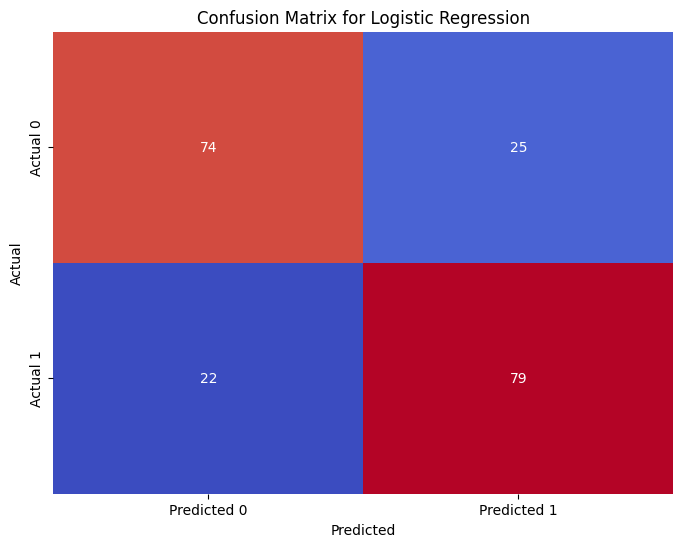

In [74]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


NAIVEBAYES CLASSIFIER

In [75]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [76]:
y_pred_nb=model_nb.predict(x_test)

In [77]:
print('NAIVE BAYES PERFORMANCE METRICS \n')
print( "Accuracy:",accuracy_score(y_test,y_pred_nb))
print("Precision:",precision_score(y_test,y_pred_nb))
print("Recall:",recall_score(y_test,y_pred_nb))
print("F1 Score:",f1_score(y_test,y_pred_nb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))
print(" Classification Report:")
print(classification_report(y_test,y_pred_nb))
print('\n')
print("************************")

NAIVE BAYES PERFORMANCE METRICS 

Accuracy: 0.755
Precision: 0.7708333333333334
Recall: 0.7326732673267327
F1 Score: 0.751269035532995
Confusion Matrix:
 [[77 22]
 [27 74]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        99
           1       0.77      0.73      0.75       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



************************


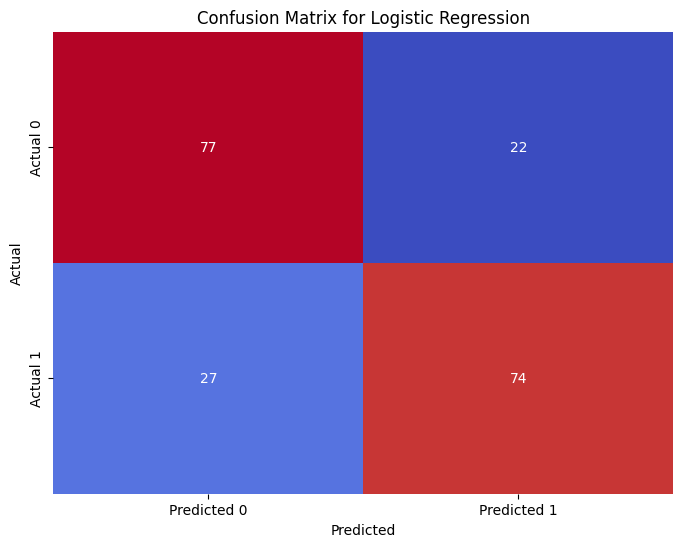

In [78]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [79]:
models={
    'random forest':RandomForestClassifier(random_state=42),
    'svm':SVC(kernel='linear',random_state=42),
    'svm(non linear)':SVC(kernel='rbf',random_state=42),
    'decision tree':DecisionTreeClassifier(random_state=42),
    'knn':KNeighborsClassifier(),
    'catboost':CatBoostClassifier(random_state=42),
    'xgboost':XGBClassifier(random_state=42),
    'lightgbm':LGBMClassifier(random_state=42),
    'naive bayes':GaussianNB(),
    }


In [80]:
for name, model in models.items():
  model.fit(x_train,y_train)


Learning rate set to 0.009366
0:	learn: 0.6880511	total: 4.1ms	remaining: 4.1s
1:	learn: 0.6830187	total: 6.08ms	remaining: 3.03s
2:	learn: 0.6772835	total: 7.97ms	remaining: 2.65s
3:	learn: 0.6724522	total: 9.88ms	remaining: 2.46s
4:	learn: 0.6678738	total: 11.8ms	remaining: 2.34s
5:	learn: 0.6627209	total: 13.8ms	remaining: 2.28s
6:	learn: 0.6580734	total: 15.7ms	remaining: 2.23s
7:	learn: 0.6543784	total: 17.6ms	remaining: 2.19s
8:	learn: 0.6500482	total: 19.5ms	remaining: 2.15s
9:	learn: 0.6465102	total: 21.3ms	remaining: 2.11s
10:	learn: 0.6423033	total: 23.3ms	remaining: 2.09s
11:	learn: 0.6378910	total: 25.3ms	remaining: 2.08s
12:	learn: 0.6336107	total: 27.2ms	remaining: 2.07s
13:	learn: 0.6303676	total: 29.1ms	remaining: 2.05s
14:	learn: 0.6266935	total: 31ms	remaining: 2.04s
15:	learn: 0.6224348	total: 32.9ms	remaining: 2.02s
16:	learn: 0.6185272	total: 34.8ms	remaining: 2.01s
17:	learn: 0.6155714	total: 36.7ms	remaining: 2s
18:	learn: 0.6123486	total: 38.6ms	remaining: 1.99s

In [89]:
for name,model in models.items():
  y_pred = model.predict(x_test)
  print(name + " Accuracy: {:.2f}".format(accuracy_score(y_test,y_pred)))
  print(name + " Precision: {:.2f}".format(precision_score(y_test,y_pred)))
  print(name + " Recall: {:.2f}".format(recall_score(y_test,y_pred)))
  print(name + " F1 Score: {:.2f}".format(f1_score(y_test,y_pred)))
  print(name + " Confusion Matrix:")
  print(confusion_matrix(y_test,y_pred))
  print(name + " Classification Report:")
  print(classification_report(y_test,y_pred))
  print('\n')
  print("************************")

random forest Accuracy: 0.80
random forest Precision: 0.77
random forest Recall: 0.84
random forest F1 Score: 0.81
random forest Confusion Matrix:
[[74 25]
 [16 85]]
random forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.77      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



************************
svm Accuracy: 0.77
svm Precision: 0.76
svm Recall: 0.78
svm F1 Score: 0.77
svm Confusion Matrix:
[[74 25]
 [22 79]]
svm Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.76      0.78      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77     



```

```

random forest,light gbm,cat boost,xg boost  CLASSIFIERs GAVE better performance.